<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_graf_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>


# Python Gráf rajzolás és animáció

<https://klajosw.blogspot.com>

<https://github.com/klajosw>

---

In [ ]:
import networkx as nx

#import pylab as plt  ## csak képállományba mentés

import matplotlib.pyplot as plt

## komolyabb megjelenítés
g = nx.Graph()
g.add_edge('a', 'b', weight=0.1)
g.add_edge('b', 'c', weight=1.5)
g.add_edge('a', 'c', weight=1.0)
g.add_edge('c', 'd', weight=2.2)

print (nx.shortest_path(g, 'b', 'd'))
## ['b', 'c', 'd']

print (nx.shortest_path(g, 'b', 'd', weight='weight'))
##['b', 'a', 'c', 'd']

plt.subplot(111) ## 2x2 megjelenítés első felső területe/ bal felső
nx.draw(g, with_labels=True, node_color='r', edge_color='b')
nx.draw_random(g, with_labels=True, node_color='b', edge_color='b')
nx.draw_circular(g, with_labels=True, node_color='g', edge_color='b')
nx.draw_spectral(g, with_labels=True, node_color='y', edge_color='b')

## plt.savefig('graph.png')

plt.show()  ## Megjelenítés

 

G = nx.cubical_graph()
plt.subplot(221) ## 2x2 megjelenítés első felső területe/ bal felső
nx.draw(G) # default spring_layout

plt.subplot(222) ## 2x2 megjelenítés második felső területe/ jobb felső
nx.draw(G, pos=nx.random_layout(G), node_color='y', edge_color='m')

plt.subplot(223) ## 2x2 megjelenítés első alsó területe/ bal alsó
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')

plt.subplot(224) ## 2x2 megjelenítés második alsó területe/ jobb alsó
nx.draw(G, pos=nx.spectral_layout(G), node_color='b', edge_color='g')

 

plt.show() ## Megjelenítés

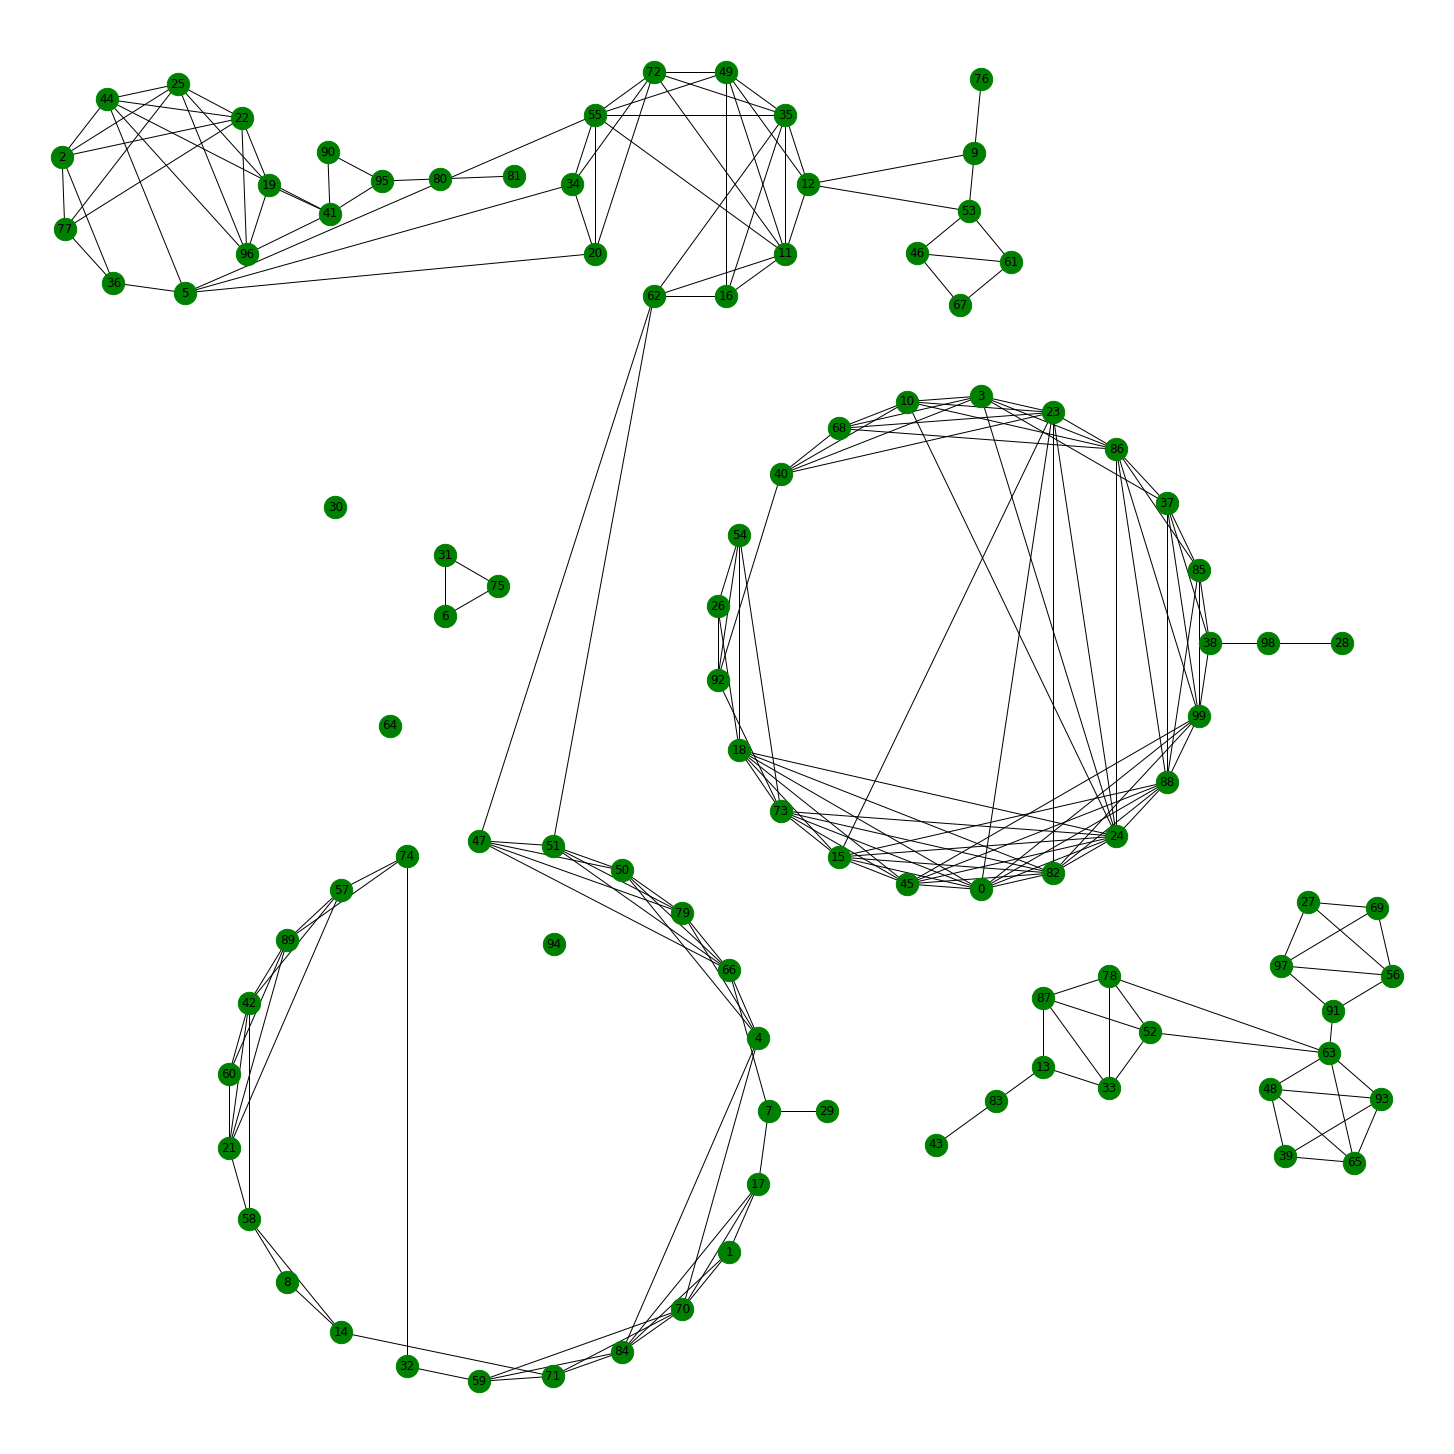

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

G = nx.random_geometric_graph(100, 0.125)
pos = graphviz_layout(G, prog='circo')
plt.figure(figsize=(20, 20))
nx.draw(G, pos, node_size=500, alpha=1, node_color="green", with_labels=True)
plt.axis('equal')
plt.show()

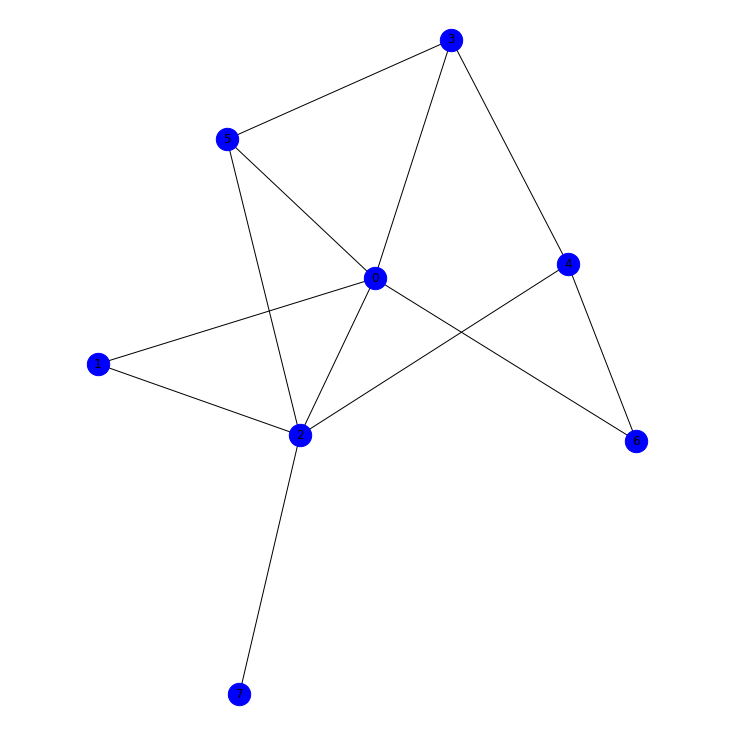

Nodes of graph: ['0', '1', '2', '3', '4', '5', '6', '7']
Edges of graph: [('0', '1'), ('0', '2'), ('0', '3'), ('0', '6'), ('0', '5'), ('1', '2'), ('2', '4'), ('2', '5'), ('2', '7'), ('3', '4'), ('3', '5'), ('4', '6')]
visiting 0
visiting neighbours of 0
stepping to edge (0, 1)
  visiting 1
  visiting neighbours of 1
  stepping to edge (1, 0)
    0 was already visited
  stepping to edge (1, 2)
    visiting 2
    visiting neighbours of 2
    stepping to edge (2, 0)
      0 was already visited
    stepping to edge (2, 1)
      1 was already visited
    stepping to edge (2, 4)
      visiting 4
      visiting neighbours of 4
      stepping to edge (4, 2)
        2 was already visited
      stepping to edge (4, 3)
        visiting 3
        visiting neighbours of 3
        stepping to edge (3, 0)
          0 was already visited
        stepping to edge (3, 4)
          4 was already visited
        stepping to edge (3, 5)
          visiting 5
          visiting neighbours of 5
          step

In [ ]:
## csúcsok bejárás figyelemmel követése
import networkx as nx
import numpy as np

from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

def depth_first_search(v, m, visited_vertices, depth):
    padding = "  "
    if v not in visited_vertices:
        print("{}visiting {}".format(padding*depth, v))
        visited_vertices.append(v)
        num_of_vertices = np.shape(m)[0]
        print("{}visiting neighbours of {}".format(padding*depth, v))
        for j in range(0, num_of_vertices):
            if m[v,j] != 0:
                print("{}stepping to edge ({}, {})".format(padding*depth, v, j))
                depth_first_search(j, m, visited_vertices, depth + 1)
    else:
        print("{}{} was already visited".format(padding*depth, v))


G=nx.Graph()
G.add_nodes_from(["0", "1", "2", "3", "4", "5", "6", "7"])
G.add_edges_from([("0", "1"), 
                  ("1", "2"), 
                  ("2", "0"), 
                  ("0", "3"), 
                  ("2", "4"), 
                  ("3", "4"), 
                  ("0", "6"), 
                  ("4", "6"), 
                  ("2", "5"), 
                  ("3", "5"), 
                  ("0", "5"), 
                  ("2", "7")])

pos = graphviz_layout(G, prog='neato')
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=500, alpha=1, node_color="blue", with_labels=True)
plt.axis('equal')
plt.show()

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))
visited_vertices = []
depth_first_search(0, nx.to_numpy_matrix(G), visited_vertices, 0)
print("Vertices were visited in the following sequence: {}".format(visited_vertices))

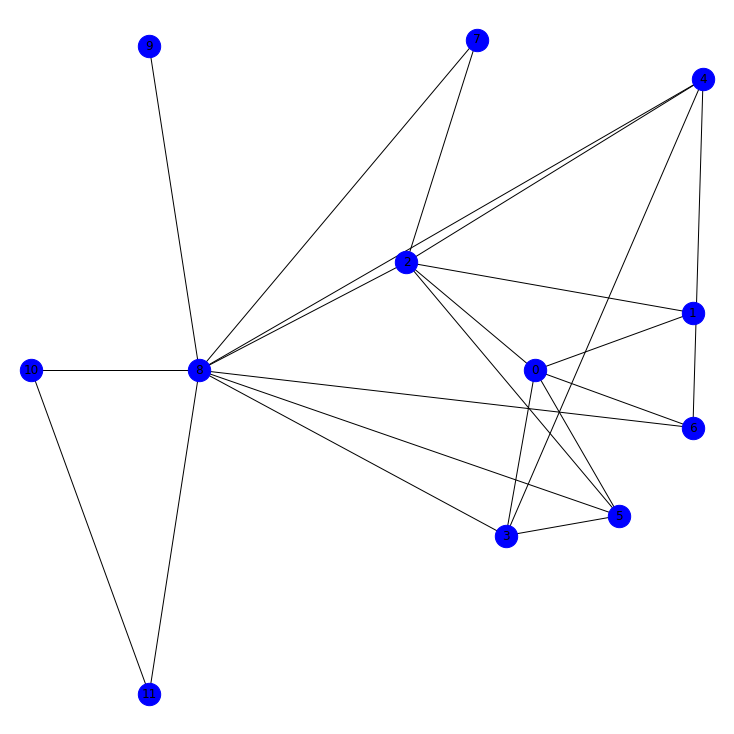

Nodes of graph: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
Edges of graph: [('0', '1'), ('0', '2'), ('0', '3'), ('0', '6'), ('0', '5'), ('1', '2'), ('2', '4'), ('2', '5'), ('2', '7'), ('2', '8'), ('3', '4'), ('3', '5'), ('3', '8'), ('4', '6'), ('4', '8'), ('5', '8'), ('6', '8'), ('7', '8'), ('8', '9'), ('8', '10'), ('8', '11'), ('10', '11')]
visiting 0
visiting 1
visiting 2
visiting 3
visiting 5
visiting 6
2 was already visited
visiting 4
5 was already visited
visiting 7
visiting 8
4 was already visited
5 was already visited
8 was already visited
8 was already visited
4 was already visited
8 was already visited
8 was already visited
8 was already visited
visiting 9
visiting 10
visiting 11
11 was already visited
Vertices were visited in the following sequence: [0, 1, 2, 3, 5, 6, 4, 7, 8, 9, 10, 11]


In [ ]:
## csúcsok bejárási sorrendje
import networkx as nx
import numpy as np
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

def mark_as_visited(v, m, visited_vertices, to_be_visited_vertices):
    if v not in visited_vertices:
        print("visiting {}".format(v))
        visited_vertices.append(v)
        num_of_vertices = np.shape(m)[0]
        for j in range(0, num_of_vertices):
            if m[v,j] != 0 and j not in visited_vertices:
                to_be_visited_vertices.append(j)
    else:
        print("{} was already visited".format(v))

def breadth_first_search(v, m, visited_vertices):
    to_be_visited_vertices = []
    mark_as_visited(v, m, visited_vertices, to_be_visited_vertices)
    while len(to_be_visited_vertices) != 0:
        j = to_be_visited_vertices.pop(0)
        mark_as_visited(j, m, visited_vertices, to_be_visited_vertices)


G=nx.Graph()
G.add_nodes_from(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"])
G.add_edges_from([("0", "1"), 
                  ("1", "2"), 
                  ("2", "0"), 
                  ("0", "3"), 
                  ("2", "4"), 
                  ("3", "4"), 
                  ("0", "6"), 
                  ("4", "6"), 
                  ("2", "5"), 
                  ("3", "5"), 
                  ("0", "5"), 
                  ("2", "7"),
                  ("7", "8"),
                  ("8", "2"),
                  ("8", "3"),
                  ("8", "4"),
                  ("8", "5"),
                  ("8", "6"),
                  ("8", "9"),
                  ("8", "10"),
                  ("8", "11"),
                  ("10", "11")])

pos = graphviz_layout(G, prog='twopi')
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=500, alpha=1, node_color="blue", with_labels=True)
plt.axis('equal')
plt.show()

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))
visited_vertices = []
breadth_first_search(0, nx.to_numpy_matrix(G), visited_vertices)
print("Vertices were visited in the following sequence: {}".format(visited_vertices))

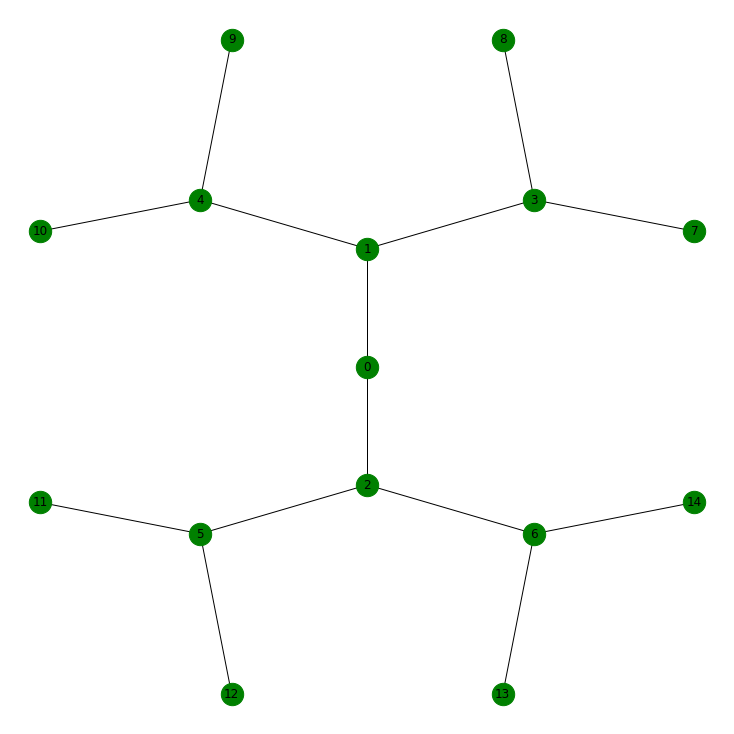

Nodes of graph: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Edges of graph: [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (4, 9), (4, 10), (5, 11), (5, 12), (6, 13), (6, 14)]
visiting 0
visiting 1
visiting 2
visiting 3
visiting 4
visiting 5
visiting 6
visiting 7
visiting 8
visiting 9
visiting 10
visiting 11
visiting 12
visiting 13
visiting 14
Vertices were visited in the following sequence: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [ ]:
## körkörösen ábrázolt fa
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

def mark_as_visited(v, m, visited_vertices, to_be_visited_vertices):
    print("visiting {}".format(v))
    visited_vertices.append(v)
    num_of_vertices = np.shape(m)[0]
    for j in range(0, num_of_vertices):
        if m[v,j] != 0 and j not in visited_vertices:
            to_be_visited_vertices.append(j)

def breadth_first_search(v, m, visited_vertices):
    to_be_visited_vertices = []
    mark_as_visited(v, m, visited_vertices, to_be_visited_vertices)
    while len(to_be_visited_vertices) != 0:
        j = to_be_visited_vertices.pop(0)
        mark_as_visited(j, m, visited_vertices, to_be_visited_vertices)

G = nx.balanced_tree(2, 3)
pos = graphviz_layout(G, prog='twopi')
plt.figure(figsize=(10, 10))
nx.draw(G, pos, node_size=500, alpha=1, node_color="green", with_labels=True)
plt.axis('equal')
plt.show()

print("Nodes of graph: {}".format(G.nodes()))
print("Edges of graph: {}".format(G.edges()))
visited_vertices = []
breadth_first_search(0, nx.to_numpy_matrix(G), visited_vertices)
print("Vertices were visited in the following sequence: {}".format(visited_vertices))

---

## Véletlen szerű séta utvonal

---

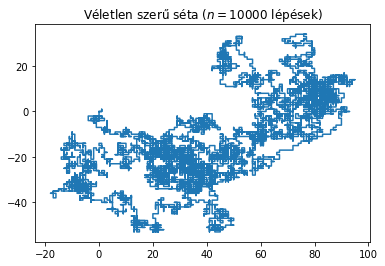

In [ ]:
##  2D véletlen szerű séta utvonal 
import numpy 
import pylab 
import random 
  
## lépésszám  (tízezer lépés)
n = 10000
  
## tömb létrehozása a kordináták részére
## alap beállítások
x = numpy.zeros(n) 
y = numpy.zeros(n) 
  
# Kordináta feltöltés véletlen sorozattal
for i in range(1, n): 
    val = random.randint(1, 4) 
    if val == 1: 
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1] 
    elif val == 2: 
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1] 
    elif val == 3: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] + 1
    else: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] - 1

## Mégjelenítés: 
pylab.title("Véletlen szerű séta ($n = " + str(n) + "$ lépések)") 
pylab.plot(x, y) 
pylab.savefig("rand_seta"+str(n)+".png",bbox_inches="tight",dpi=600) 
pylab.show() 

---

## Véletlen szerű mozgások megjelenítése

---

In [ ]:
## Installálás ha kell
!conda install -c conda-forge ffmpeg
!conda install -c conda-forge imagemagick

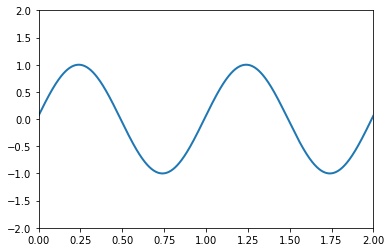

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML, Image
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)
def init():
    line.set_data([], [])
    return (line,)
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)
# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)

# anim
anim.save('kl_anim0.gif', writer='imagemagick', fps=60)
Image(url='kl_anim0.gif')


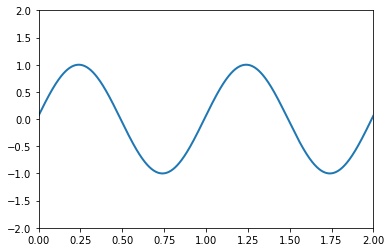

In [ ]:
## sinus görbe folyamatos rajzolása
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, Image 

Writer = animation.FFMpegWriter(fps=30, codec='libx264')  #or 
# Writer = animation.FFMpegWriter(fps=20, metadata=dict(artist='Me'), bitrate=1800)


##
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)


def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True) ## animáció
# anim.save('kl_anim1.mp4', fps=30, extra_args=['-vcodec', 'libx264'])  ## mentés mp4-be
anim.save('kl_anim1.mp4', fps=30, extra_args=['-vcodec', 'libx264'])  ## mentés mp4-be
anim.save('kl_anim1.gif', writer='imagemagick', fps=30)
Image(url='kl_anim1.gif')

## HTML(anim.to_html5_video())  ## megjelenítés

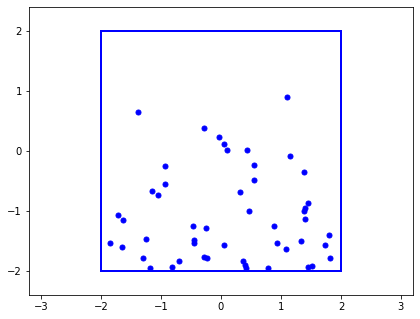

In [ ]:
## golyok leesése
import numpy as np
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from IPython.display import HTML, Image 

class ParticleBox:
    """Orbits class
    
    init_state is an [N x 4] array, where N is the number of particles:
       [[x1, y1, vx1, vy1],
        [x2, y2, vx2, vy2],
        ...               ]

    bounds is the size of the box: [xmin, xmax, ymin, ymax]
    """
    def __init__(self,
                 init_state = [[1, 0, 0, -1],
                               [-0.5, 0.5, 0.5, 0.5],
                               [-0.5, -0.5, -0.5, 0.5]],
                 bounds = [-2, 2, -2, 2],
                 size = 0.04,
                 M = 0.05,
                 G = 9.8):
        self.init_state = np.asarray(init_state, dtype=float)
        self.M = M * np.ones(self.init_state.shape[0])
        self.size = size
        self.state = self.init_state.copy()
        self.time_elapsed = 0
        self.bounds = bounds
        self.G = G

    def step(self, dt):
        """step once by dt seconds"""
        self.time_elapsed += dt
        
        # update positions
        self.state[:, :2] += dt * self.state[:, 2:]

        # find pairs of particles undergoing a collision
        D = squareform(pdist(self.state[:, :2]))
        ind1, ind2 = np.where(D < 2 * self.size)
        unique = (ind1 < ind2)
        ind1 = ind1[unique]
        ind2 = ind2[unique]

        # update velocities of colliding pairs
        for i1, i2 in zip(ind1, ind2):
            # mass
            m1 = self.M[i1]
            m2 = self.M[i2]

            # location vector
            r1 = self.state[i1, :2]
            r2 = self.state[i2, :2]

            # velocity vector
            v1 = self.state[i1, 2:]
            v2 = self.state[i2, 2:]

            # relative location & velocity vectors
            r_rel = r1 - r2
            v_rel = v1 - v2

            # momentum vector of the center of mass
            v_cm = (m1 * v1 + m2 * v2) / (m1 + m2)

            # collisions of spheres reflect v_rel over r_rel
            rr_rel = np.dot(r_rel, r_rel)
            vr_rel = np.dot(v_rel, r_rel)
            v_rel = 2 * r_rel * vr_rel / rr_rel - v_rel

            # assign new velocities
            self.state[i1, 2:] = v_cm + v_rel * m2 / (m1 + m2)
            self.state[i2, 2:] = v_cm - v_rel * m1 / (m1 + m2) 

        # check for crossing boundary
        crossed_x1 = (self.state[:, 0] < self.bounds[0] + self.size)
        crossed_x2 = (self.state[:, 0] > self.bounds[1] - self.size)
        crossed_y1 = (self.state[:, 1] < self.bounds[2] + self.size)
        crossed_y2 = (self.state[:, 1] > self.bounds[3] - self.size)

        self.state[crossed_x1, 0] = self.bounds[0] + self.size
        self.state[crossed_x2, 0] = self.bounds[1] - self.size

        self.state[crossed_y1, 1] = self.bounds[2] + self.size
        self.state[crossed_y2, 1] = self.bounds[3] - self.size

        self.state[crossed_x1 | crossed_x2, 2] *= -1
        self.state[crossed_y1 | crossed_y2, 3] *= -1

        # add gravity
        self.state[:, 3] -= self.M * self.G * dt


#------------------------------------------------------------
# set up initial state
np.random.seed(0)
init_state = -0.5 + np.random.random((50, 4))
init_state[:, :2] *= 3.9

box = ParticleBox(init_state, size=0.04)
dt = 1. / 30 # 30fps


#------------------------------------------------------------
# set up figure and animation
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False, xlim=(-3.2, 3.2), ylim=(-2.4, 2.4))

# particles holds the locations of the particles
particles, = ax.plot([], [], 'bo', ms=6)

# rect is the box edge
rect = plt.Rectangle(box.bounds[::2],
                     box.bounds[1] - box.bounds[0],
                     box.bounds[3] - box.bounds[2],
                     ec='none', lw=2, fc='none')
ax.add_patch(rect)

def init():
    """initialize animation"""
    global box, rect
    particles.set_data([], [])
    rect.set_edgecolor('none')
    return particles, rect

def animate(i):
    """perform animation step"""
    global box, rect, dt, ax, fig
    box.step(dt)

    ms = int(fig.dpi * 2 * box.size * fig.get_figwidth()
             / np.diff(ax.get_xbound())[0])
    
    # update pieces of the animation
    rect.set_edgecolor('b')
    particles.set_data(box.state[:, 0], box.state[:, 1])
    particles.set_markersize(ms)
    return particles, rect

ani = animation.FuncAnimation(fig, animate, frames=600, interval=10, blit=True, init_func=init)
ani.save('kl_anim2.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
ani.save('kl_anim2.gif', writer='imagemagick', fps=30)
Image(url='kl_anim2.gif')
#plt.show()
#HTML(ani.to_html5_video())

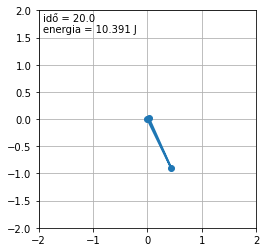

In [ ]:

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from IPython.display import HTML, Image 

class DoublePendulum:
    """Double Pendulum Class

    init_state is [theta1, omega1, theta2, omega2] in degrees,
    where theta1, omega1 is the angular position and velocity of the first
    pendulum arm, and theta2, omega2 is that of the second pendulum arm
    """
    def __init__(self,
                 init_state = [120, 0, -20, 0],
                 L1=1.0,  # length of pendulum 1 in m
                 L2=1.0,  # length of pendulum 2 in m
                 M1=1.0,  # mass of pendulum 1 in kg
                 M2=1.0,  # mass of pendulum 2 in kg
                 G=9.8,  # acceleration due to gravity, in m/s^2
                 origin=(0, 0)): 
        self.init_state = np.asarray(init_state, dtype='float')
        self.params = (L1, L2, M1, M2, G)
        self.origin = origin
        self.time_elapsed = 0

        self.state = self.init_state * np.pi / 180.
    
    def position(self):
        """compute the current x,y positions of the pendulum arms"""
        (L1, L2, M1, M2, G) = self.params

        x = np.cumsum([self.origin[0],
                       L1 * sin(self.state[0]),
                       L2 * sin(self.state[2])])
        y = np.cumsum([self.origin[1],
                       -L1 * cos(self.state[0]),
                       -L2 * cos(self.state[2])])
        return (x, y)

    def energy(self):
        """compute the energy of the current state"""
        (L1, L2, M1, M2, G) = self.params

        x = np.cumsum([L1 * sin(self.state[0]),
                       L2 * sin(self.state[2])])
        y = np.cumsum([-L1 * cos(self.state[0]),
                       -L2 * cos(self.state[2])])
        vx = np.cumsum([L1 * self.state[1] * cos(self.state[0]),
                        L2 * self.state[3] * cos(self.state[2])])
        vy = np.cumsum([L1 * self.state[1] * sin(self.state[0]),
                        L2 * self.state[3] * sin(self.state[2])])

        U = G * (M1 * y[0] + M2 * y[1])
        K = 0.5 * (M1 * np.dot(vx, vx) + M2 * np.dot(vy, vy))

        return U + K

    def dstate_dt(self, state, t):
        """compute the derivative of the given state"""
        (M1, M2, L1, L2, G) = self.params

        dydx = np.zeros_like(state)
        dydx[0] = state[1]
        dydx[2] = state[3]

        cos_delta = cos(state[2] - state[0])
        sin_delta = sin(state[2] - state[0])

        den1 = (M1 + M2) * L1 - M2 * L1 * cos_delta * cos_delta
        dydx[1] = (M2 * L1 * state[1] * state[1] * sin_delta * cos_delta
                   + M2 * G * sin(state[2]) * cos_delta
                   + M2 * L2 * state[3] * state[3] * sin_delta
                   - (M1 + M2) * G * sin(state[0])) / den1

        den2 = (L2 / L1) * den1
        dydx[3] = (-M2 * L2 * state[3] * state[3] * sin_delta * cos_delta
                   + (M1 + M2) * G * sin(state[0]) * cos_delta
                   - (M1 + M2) * L1 * state[1] * state[1] * sin_delta
                   - (M1 + M2) * G * sin(state[2])) / den2
        
        return dydx

    def step(self, dt):
        """execute one time step of length dt and update state"""
        self.state = integrate.odeint(self.dstate_dt, self.state, [0, dt])[1]
        self.time_elapsed += dt

#------------------------------------------------------------
# set up initial state and global variables
pendulum = DoublePendulum([180., 0.0, -20., 0.0])
dt = 1./30 # 30 fps

#------------------------------------------------------------
# set up figure and animation
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
energy_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)

def init():
    """initialize animation"""
    line.set_data([], [])
    time_text.set_text('')
    energy_text.set_text('')
    return line, time_text, energy_text

def animate(i):
    """perform animation step"""
    global pendulum, dt
    pendulum.step(dt)
    
    line.set_data(*pendulum.position())
    time_text.set_text('idő = %.1f' % pendulum.time_elapsed)
    energy_text.set_text('energia = %.3f J' % pendulum.energy())
    return line, time_text, energy_text

from time import time
t0 = time()
animate(0)
t1 = time()
interval = 1000 * dt - (t1 - t0)

ani = animation.FuncAnimation(fig, animate, frames=300,  interval=interval, blit=True, init_func=init)

ani.save('kl_anim3.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

ani.save('kl_anim3.gif', writer='imagemagick', fps=30)
Image(url='kl_anim3.gif')

#plt.show()
#HTML(ani.to_html5_video())

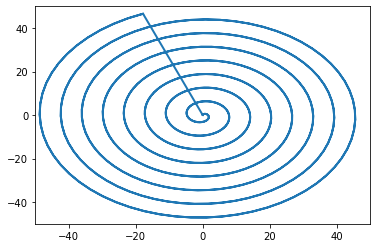

In [ ]:
import matplotlib.animation as animation  
import matplotlib.pyplot as plt  
import numpy as np  
from IPython.display import HTML, Image 
%matplotlib inline
  
# Üres ablak 
fig = plt.figure()  
axis = plt.axes(xlim =(-50, 50), 
                ylim =(-50, 50))  
  
line, = axis.plot([], [], lw = 2)  
   
def init():  
    line.set_data([], [])  
    return line,  
   

xdata, ydata = [], []  
   
# animation function  
def animate(i):  
    t = 0.1 * i  
    x = t * np.sin(t)  
    y = t * np.cos(t)  
       
    xdata.append(x)  
    ydata.append(y)  
    line.set_data(xdata, ydata)  
      
    return line, 
   
    
anim = animation.FuncAnimation(fig, animate, init_func = init, frames = 500, interval = 20, blit = True)  
   
anim.save('kl_anim4.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
anim.save('kl_anim4.gif', writer='imagemagick', fps=30)
Image(url='kl_anim4.gif')

#plt.show()
#HTML(anim.to_html5_video())

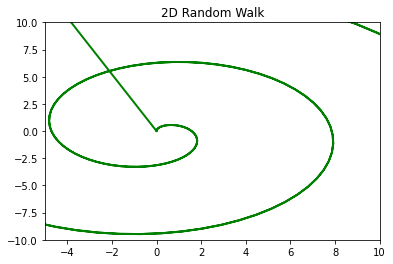

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, Image 

#setting up steps for simulating 2D
dims = 2
step_n = 200
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))
#Simulate steps in 2D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)


fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2, c='green')
ax.set_ylim(-10, 10)
ax.set_xlim(-5, 10)
plt.title('2D Random Walk')
xdata, ydata = [], []
del xdata[:]
del ydata[:]
line.set_data(xdata, ydata)

##matplotlib.Animation

anim = animation.FuncAnimation(fig, animate, init_func = init, frames = 500, interval = 20, blit = True)  

anim.save('kl_anim6.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
anim.save('kl_anim6.gif', writer='imagemagick', fps=30)
Image(url='kl_anim6.gif')

#plt.show()
#HTML(anim.to_html5_video())